<a href="https://colab.research.google.com/github/Yashas08-RY/Python-ML-/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import io
df=pd.read_csv("titanic_dataset - Copy.csv")
print("--- First 5  Rows ---")
print(df.head())
print("\--- Data Info ---")
buffer = io.StringIO()
df.info(buf=buffer)
print(buffer.getvalue())
print("\n--- Missing Values --- ")
print(df.isnull().sum())

--- First 5  Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

<>:6: SyntaxWarning: invalid escape sequence '\-'
<>:6: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipython-input-82039593.py:6: SyntaxWarning: invalid escape sequence '\-'
  print("\--- Data Info ---")


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df = df.drop(['SibSp', 'Parch'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'],drop_first=True)
print("--- Data Preprocessing Complete ---")

--- Data Preprocessing Complete ---


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Survived', axis=1)
y = df['Survived']

print("---Final Features(Head)")
print(X.head())
print("---Final Target(Head)")
print(y.head())
feature_names = X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(model.predict([[3,0,22.0,7.2500,2,False,True]]))
print("\n--- Model Training Complete ---")

---Final Features(Head)
   Pclass  Sex   Age     Fare  FamilySize  Embarked_Q  Embarked_S
0       3    0  22.0   7.2500           2       False        True
1       1    1  38.0  71.2833           2       False       False
2       3    1  26.0   7.9250           1       False        True
3       1    1  35.0  53.1000           2       False        True
4       3    0  35.0   8.0500           1       False        True
---Final Target(Head)
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
[0]

--- Model Training Complete ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
model.score(X_test,y_test)

0.8156424581005587

--- Confusion Matrix ---
[[90 15]
 [18 56]]
Accuracy:0.8156(or81.56%)

--- Classification Report ---
                    precision    recall  f1-score   support

Did not survive(0)       0.83      0.86      0.85       105
       Survived(1)       0.79      0.76      0.77        74

          accuracy                           0.82       179
         macro avg       0.81      0.81      0.81       179
      weighted avg       0.81      0.82      0.82       179

--3.confusion matrix(and plot)--
[[90 15]
 [18 56]]

 Heatmap of the confusion matrix has been sabed as 'confusion_matrix_heatmap.png'

---4,Learning curves (and plot)---

 Learning curves have been saved as 'learning_curves.png'


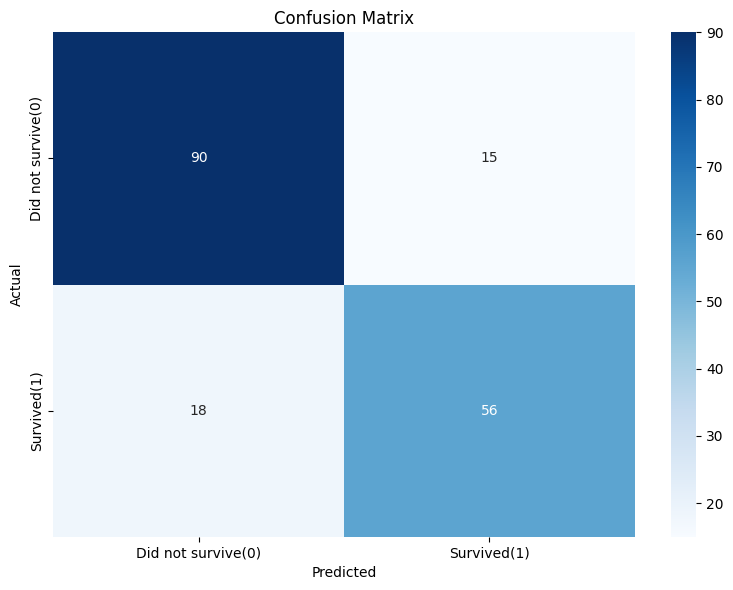

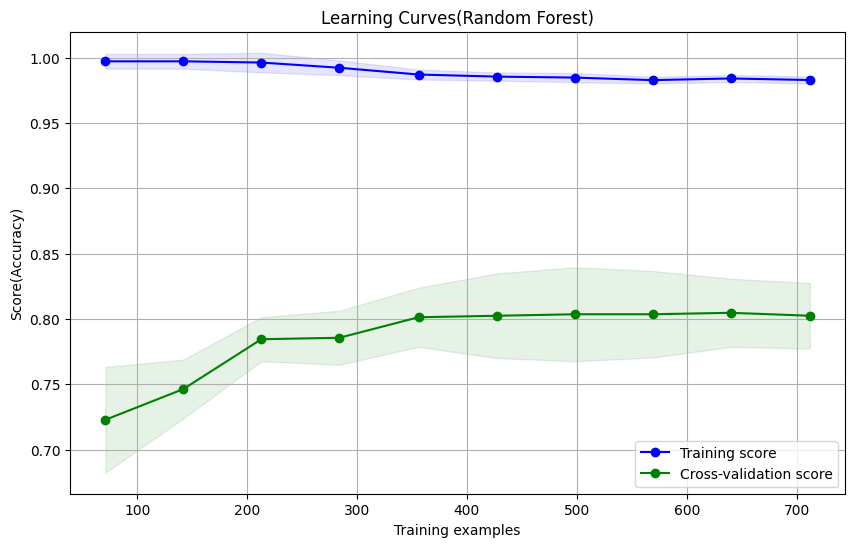

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

y_pred = model.predict(X_test)
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy here
print(f"Accuracy:{accuracy:.4f}(or{accuracy*100:.2f}%)") # Added percentage sign for clarity
print("\n--- Classification Report ---")
report = classification_report(y_test, y_pred,target_names=['Did not survive(0)','Survived(1)'])
print(report)
print("--3.confusion matrix(and plot)--")
cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Did not survive(0)','Survived(1)'],yticklabels=['Did not survive(0)','Survived(1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()

plt.savefig('confusion_matrix_heatmap.png')
print("\n Heatmap of the confusion matrix has been sabed as 'confusion_matrix_heatmap.png'")
print("\n---4,Learning curves (and plot)---")
train_sizes,train_scores,validation_scores=learning_curve(
    estimator=RandomForestClassifier(n_estimators=100,random_state=42),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
validation_scores_mean=np.mean(validation_scores,axis=1)
validation_scores_std=np.std(validation_scores,axis=1)

plt.figure(figsize=(10,6))
plt.title("Learning Curves(Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score(Accuracy)")
plt.grid()
plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='b')
plt.fill_between(train_sizes,validation_scores_mean-validation_scores_std,validation_scores_mean+validation_scores_std,alpha=0.1,color='g')

plt.plot(train_sizes,train_scores_mean,'o-',color='b',label='Training score')
plt.plot(train_sizes,validation_scores_mean,'o-',color='g',label='Cross-validation score')
plt.legend(loc='best')
plt.savefig('learning_curves.png')
print("\n Learning curves have been saved as 'learning_curves.png'")